In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import random 

Arquivos logjez baixados direto do TSE (https://dadosabertos.tse.jus.br/dataset/resultados-2022-arquivos-transmitidos-para-totalizacao) foram previamente convertidos com o script extracao_dados_eleicao_br disponível no github.
<p>O script processa cada arquivo de LOG nos ZIP's para gerar um CSV com os dados das urnas, incluindo municipio, zona, secao e modelo da urna
<P><code>for %f in (*.zip) do python3.10.exe extracao_dados_eleicao_br/main.py -z %f</code>
<p>Os arquivos são então carregados em uma matriz, e combinados na tabela <b>urnas</b>

In [3]:
path = "./DadosUrnas/bu_imgbu_logjez_rdv_vscmr_2022_2t_*.csv"
filenames = glob.glob(path)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "ISO-8859-1"))

urnas = pd.concat(dfs, ignore_index=True).dropna()

Vamos renomear algumas colunas para ficar de acordo com o padrão do arquivo de votos, que será carregado posteriormente. Assim fica mais facil fazer a correlação entre as duas tabelas

In [4]:
urnas = urnas.rename(columns = {
    'Diretório': 'pasta',
    'Arquivo': 'arquivo',
    'Município': 'municipio_cod',
    'Zona Eleitoral':'zona',
    'Local de Votação': 'local',
    'Seção Eleitoral':'secao',
    'Versão da aplicação':'versao',
    'Turno da UE':'turno',
    'Identificação do Modelo de Urna':'urna',
    'Fase da UE':'fase',
    'Serial de votação da MV':'serial_votacao'})

A partir do nome da pasta (zip), vamos derivar o código do estado

In [5]:
urnas["UF"] = urnas["pasta"].str[-2:]

In [6]:
urnas = urnas.drop_duplicates(["municipio_cod","zona","secao"])

Aqui apresento uma amostra (linhas iniciais) da tabela de urnas:

In [7]:
urnas.sort_index().head(10)

pasta                      arquivo  \
0  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090001.logjez   
1  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090002.logjez   
2  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090003.logjez   
3  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090004.logjez   
4  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090005.logjez   
5  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090006.logjez   
6  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090007.logjez   
7  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090008.logjez   
8  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090009.logjez   
9  bu_imgbu_logjez_rdv_vscmr_2022_2t_AC  o00407-0100700090010.logjez   

   municipio_cod  zona   local  secao                   versao     turno  \
0           1007     9  1104.0      1  8.26.0.0 - Onça-pintada  2º turno   
1           1007     9  1104.0      2  8.26.0.0 - Onça-pintada  2º turno   
2           1007     9  1104.0      3  8.26.0.0 - Onça-pintada  2º turno   
3           1007     9  1104.0      4  8.26.0.0 - Onça-pintada  2º turno   
4           1007     9  1112.0      5  8.26.0.0 - Onça-pintada  2º turno   
5           1007     9  1112.0      6  8.26.0.0 - Onça-pintada  2º turno   
6           1007     9     0.0      7  8.26.0.0 - Onça-pintada  2º turno   
7           1007     9  1023.0      8  8.26.0.0 - Onça-pintada  2º turno   
8           1007     9  1023.0      9  8.26.0.0 - Onça-pintada  2º turno   
9           1007     9  1023.0     10  8.26.0.0 - Onça-pintada  2º turno   

     urna     fase serial_votacao  UF  
0  UE2013  Oficial       44677268  AC  
1  UE2013  Oficial       7306E323  AC  
2  UE2013  Oficial       2EFCC23E  AC  
3  UE2013  Oficial       FF627AC1  AC  
4  UE2013  Oficial       16B47158  AC  
5  UE2013  Oficial       F0A29B48  AC  
6  UE2009  Oficial       77AD1FEC  AC  
7  UE2013  Oficial       C483B037  AC  
8  UE2013  Oficial       8C16E44A  AC  
9  UE2013  Oficial       41F9FC59  AC

In [8]:
urnas.shape[0]

471968

Aqui carregamos os arquivo com os votos.
<p>Os arquivos de boletim de urna foram baixados usando o script download.php, e depois convertidos em CSV com o bu_dump.py (ambos disponiveis na pasta DownloadBU)

In [9]:
path = "./csv/mun/*-mun.csv"
filenames = glob.glob(path)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding = "ISO-8859-1"))

votos = pd.concat(dfs, ignore_index=True).dropna().astype({'municipio_cod':'int', 'zona': 'int', 'secao': 'int'}).drop_duplicates(["municipio_cod","zona","secao"])

In [10]:
votos.sample(10)

estado          municipio  municipio_cod  zona  secao  candidato_13  \
152740     mg         MATO VERDE          48194   180    127         187.0   
185299     mt  TANGARÃ DA SERRA          91855    19    301          64.0   
52703      ce           ACOPIARA          13056    60      9         154.0   
389487     sp           GUARUJÃ          64750   212     14          92.0   
299712     rj     RIO DE JANEIRO          60011   188    247         126.0   
342460     rs       TUPANCIRETÃ          89478    87     47         120.0   
268871     pr           MATINHOS          79634   194    218          89.0   
128006     mg     BELO HORIZONTE          41238    31     21         143.0   
125482     mg           ARGIRITA          40878   161     10         108.0   
382846     sp        COSMÃPOLIS          63576   360     63         105.0   

        candidato_22  
152740         112.0  
185299         185.0  
52703           45.0  
389487         190.0  
299712         202.0  
342460         125.0  
268871         119.0  
128006         191.0  
125482          51.0  
382846         169.0

In [11]:
votos.shape[0]

470956

Aqui vamos consolidar as tabelas de votos e de urnas para complementar os dados correlacionados.
<p>Os dados são combinados e saneados para evitar duplicidades

In [12]:
votosConsolidados = votos.set_index(['municipio_cod','zona','secao']).join(urnas.set_index(['municipio_cod','zona','secao']),validate="1:m",how='inner').dropna()

In [13]:
votosConsolidados = votosConsolidados[['UF','municipio','candidato_13','candidato_22','urna']].sort_index().drop_duplicates()

In [14]:
votosConsolidados.shape[0]

444859

In [15]:
votosConsolidados.sample(20)

UF               municipio  candidato_13  \
municipio_cod zona secao                                             
41238         28   290    MG          BELO HORIZONTE         171.0   
19755         68   146    PB              CAJAZEIRAS         165.0   
58653         71   96     RJ                NITERÃI         178.0   
14079         73   16     CE                IBIAPINA         110.0   
74357         50   224    PR              ARAUCÃRIA         122.0   
8141          106  88     MA       PRESIDENTE SARNEY         106.0   
71072         248  847    SP              SÃO PAULO         144.0   
59030         59   22     RJ    SÃO PEDRO DA ALDEIA          66.0   
38075         122  406    BA            PORTO SEGURO         158.0   
75116         168  70     PR            MANGUEIRINHA         125.0   
81833         104  75     SC                   LAGES          93.0   
58033         92   32     RJ                ARARUAMA          76.0   
28258         10   174    AL    PALMEIRA DOS ÃNDIOS         160.0   
70459         187  35     SP  SANTANA DA PONTE PENSA          71.0   
56472         24   58     ES               GUARAPARI         106.0   
33634         70   321    BA               BARREIRAS         202.0   
4707          75   348    PA     CANAÃ DOS CARAJÃS          80.0   
62499         26   349    SP                BOTUCATU         108.0   
71072         246  338    SP              SÃO PAULO         153.0   
6050          2    228    AP                 MACAPÃ         118.0   

                          candidato_22    urna  
municipio_cod zona secao                        
41238         28   290           165.0  UE2020  
19755         68   146            24.0  UE2015  
58653         71   96            131.0  UE2010  
14079         73   16             47.0  UE2009  
74357         50   224           155.0  UE2020  
8141          106  88             17.0  UE2020  
71072         248  847           147.0  UE2010  
59030         59   22            143.0  UE2010  
38075         122  406           120.0  UE2013  
75116         168  70            143.0  UE2010  
81833         104  75            174.0  UE2020  
58033         92   32            172.0  UE2010  
28258         10   174            91.0  UE2015  
70459         187  35            115.0  UE2015  
56472         24   58            138.0  UE2011  
33634         70   321            81.0  UE2009  
4707          75   348           180.0  UE2011  
62499         26   349           161.0  UE2010  
71072         246  338           174.0  UE2009  
6050          2    228           145.0  UE2020

Os dados não necessariamente contem todas as seções, mas para uma análise de comportamento das urnas é necessário ter uma boa representação por estado, conforme a distribuição exibida abaixo

Text(0.5, 1.0, 'Tipo de Urna Por Estado')

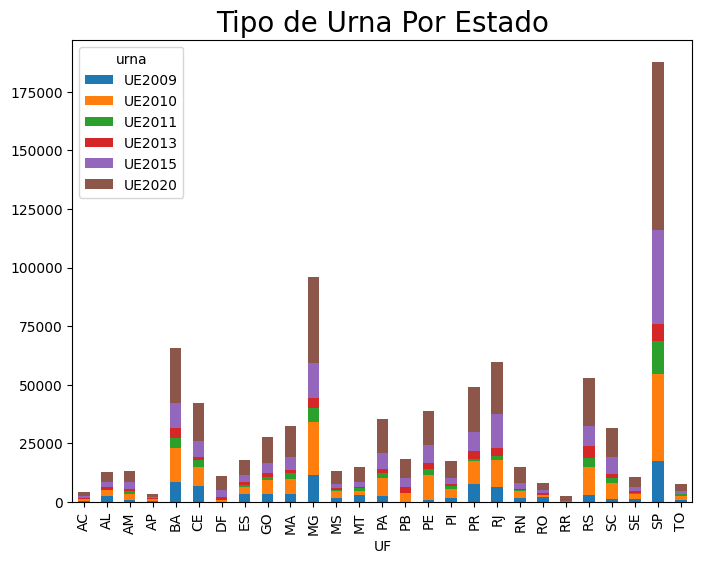

In [16]:
urnasPorUF = pd.pivot_table(data=votosConsolidados[['UF','urna']], index=['UF'], columns=['urna'], aggfunc=np.count_nonzero)
ax = urnasPorUF.plot.bar(stacked=True, figsize=(8,6))
ax.set_title('Tipo de Urna Por Estado', fontsize=20)

Os graficos abaixo mostram a distribuição de votos apurados nas urnas UE2020 e o contraste para as não UE2020 (anteriores a 2020 que não foram auditadas no pleito de 2022)

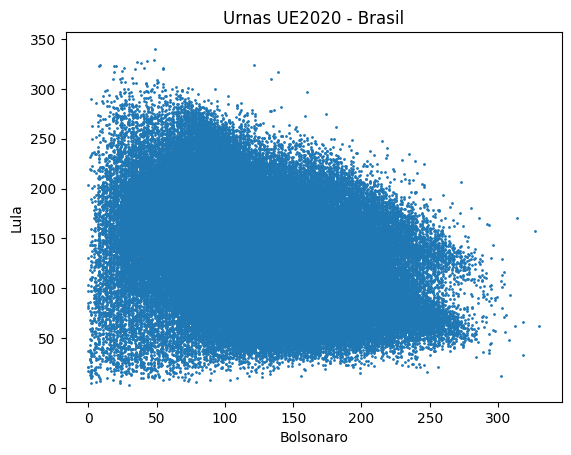

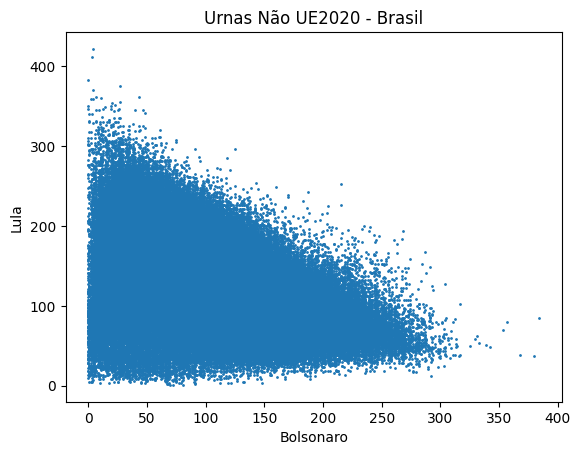

In [17]:
data = votosConsolidados.query("urna == 'UE2020'")
plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
plt.title("Urnas UE2020 - Brasil")
plt.xlabel("Bolsonaro")
plt.ylabel("Lula")
plt.show()

data = votosConsolidados.query("urna != 'UE2020'")
plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
plt.title("Urnas Não UE2020 - Brasil")
plt.xlabel("Bolsonaro")
plt.ylabel("Lula")
plt.show()

Abaixo os mesmos graficos por tipo de urna

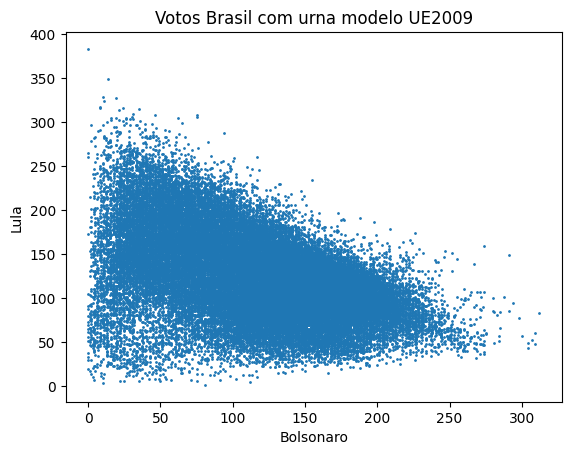

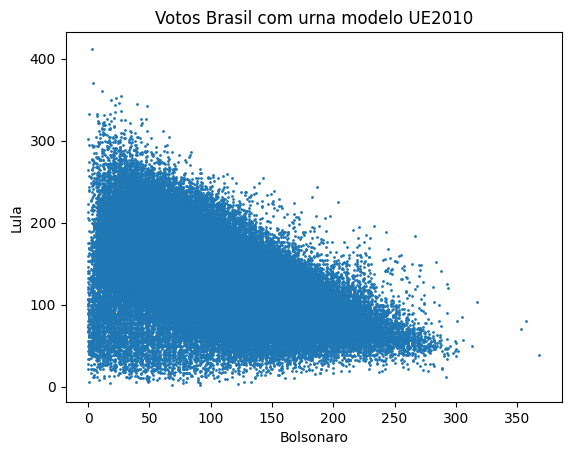

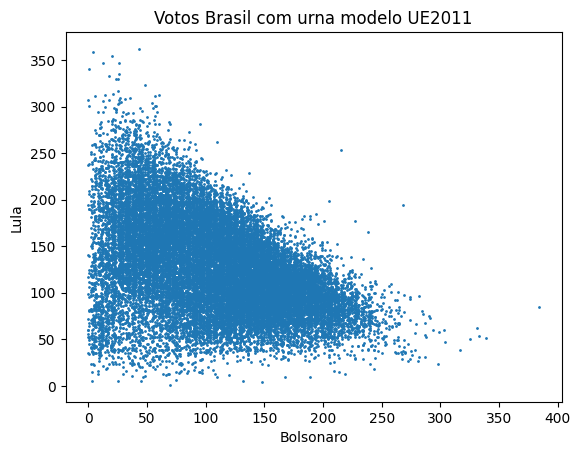

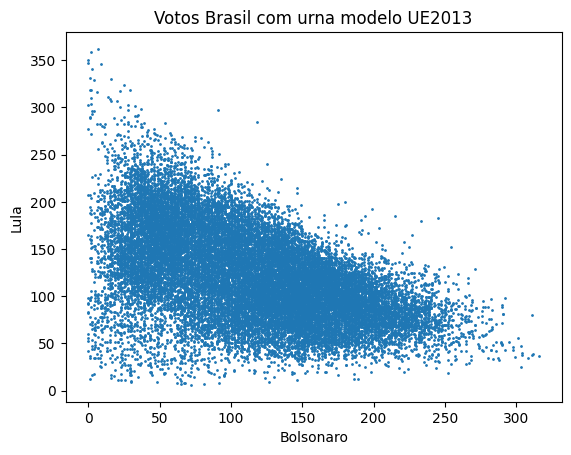

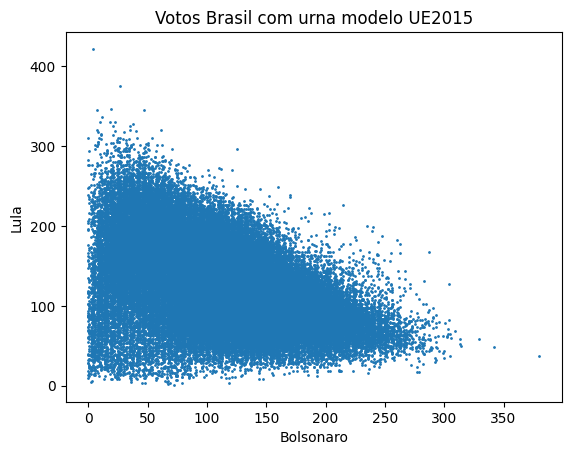

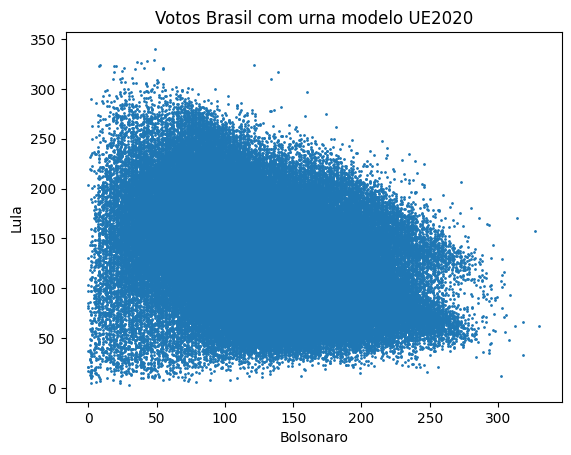

In [18]:
for index, row in votosConsolidados.filter(['urna'], axis=1).drop_duplicates().sort_values("urna").iterrows():
    data = votosConsolidados.query("urna == '"+row['urna']+"'")
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Votos Brasil com urna modelo "+row["urna"])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()


Aqui os mesmos dados para as urnas por UF

RO


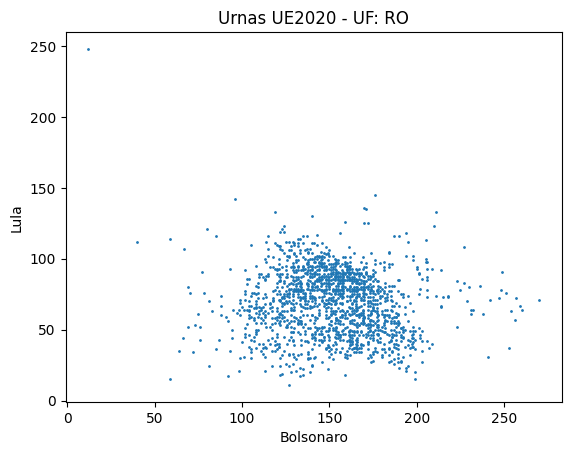

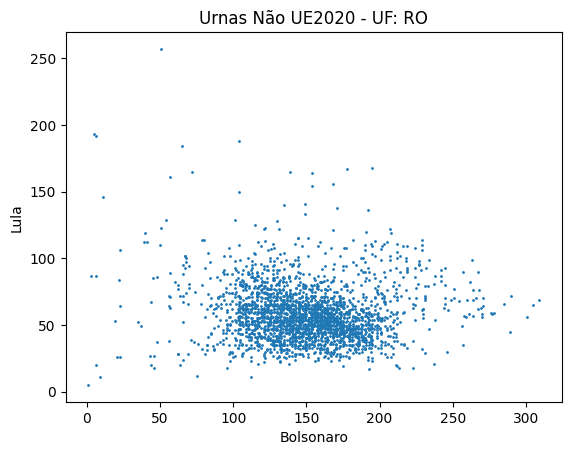

AC


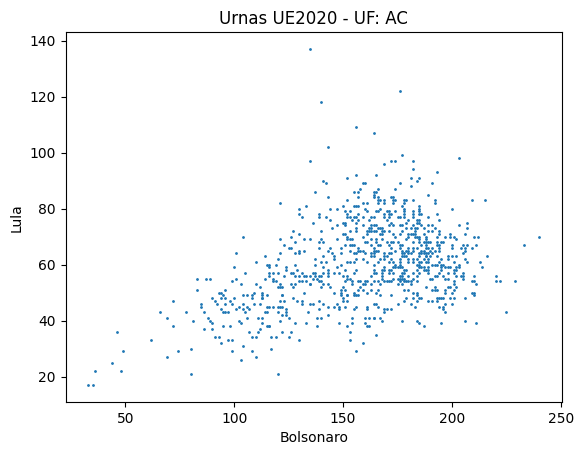

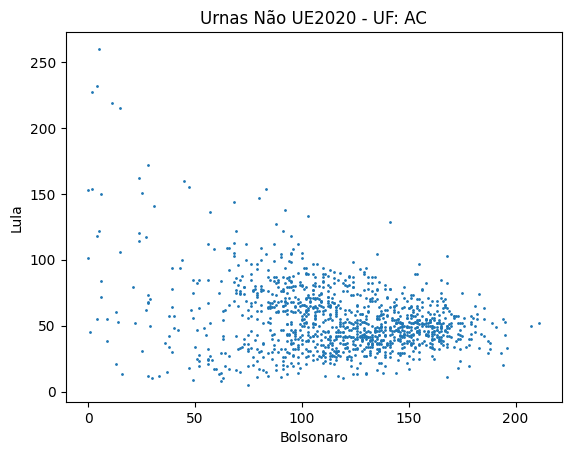

AM


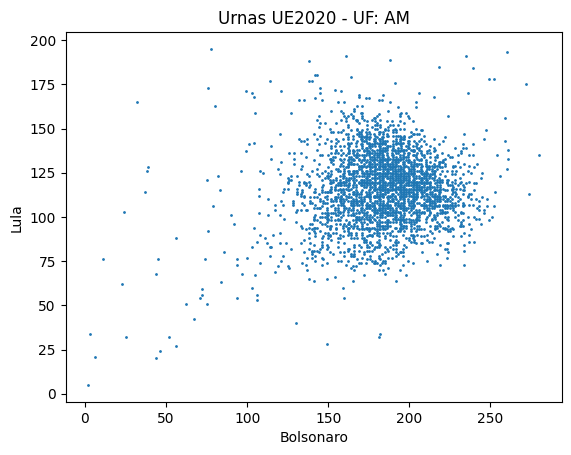

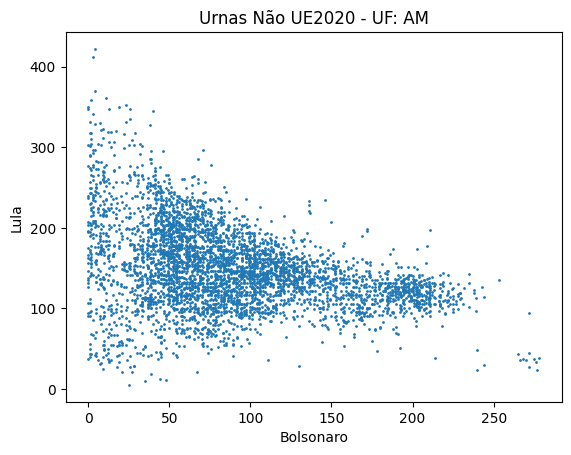

RR


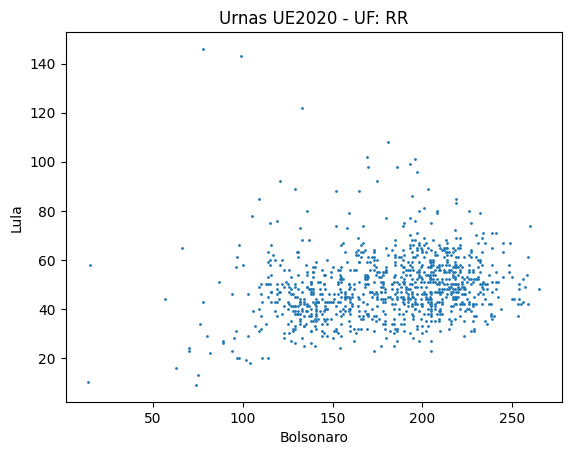

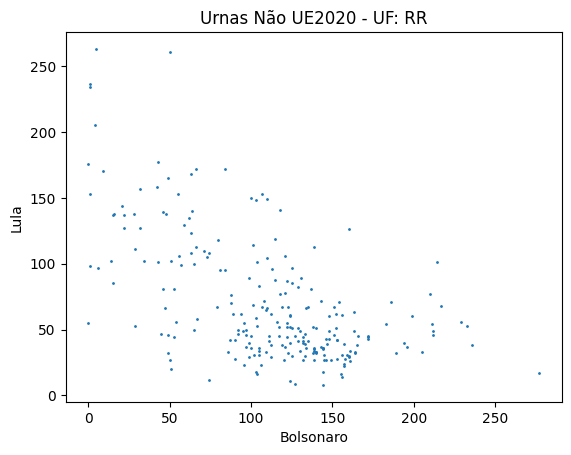

PA


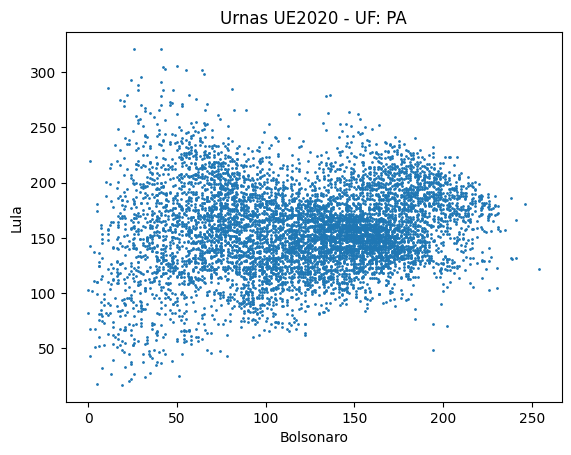

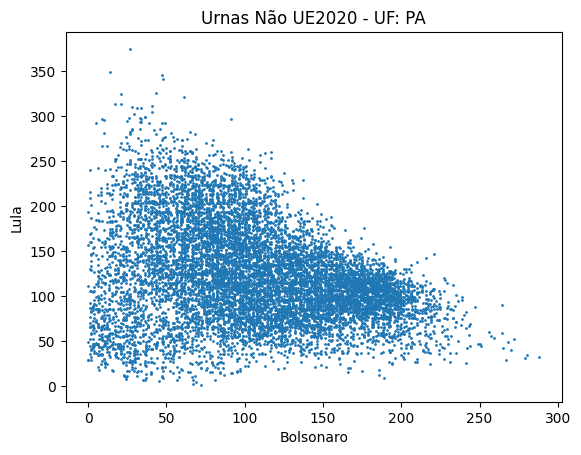

AP


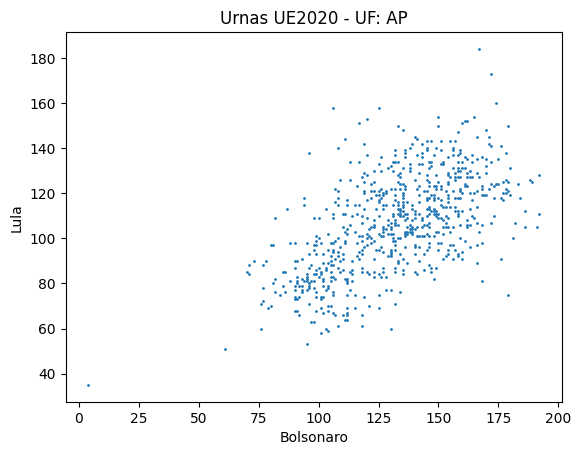

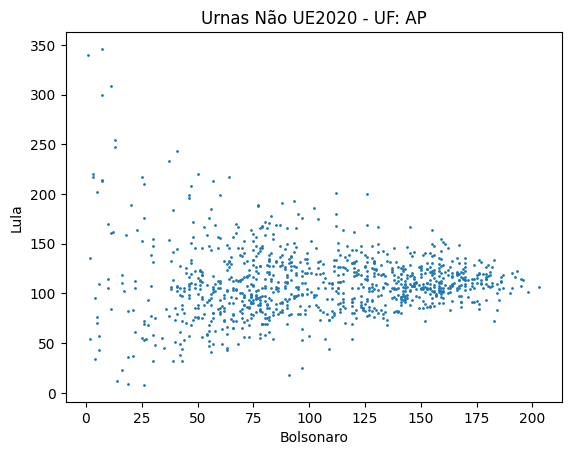

MA


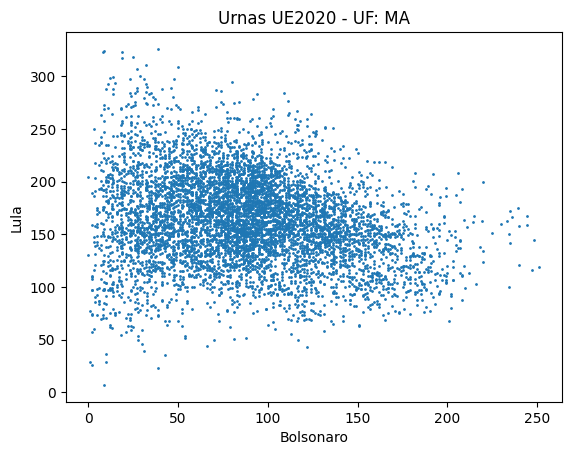

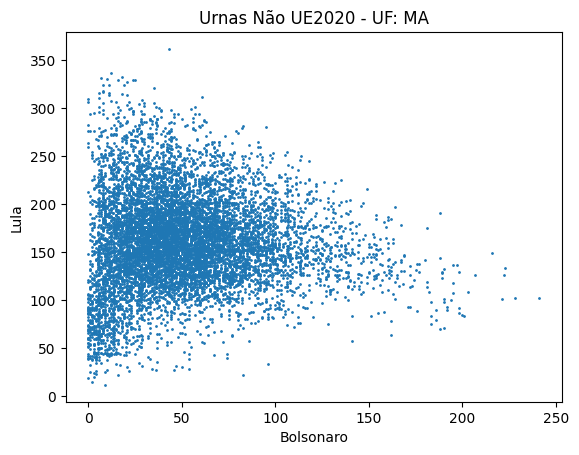

PI


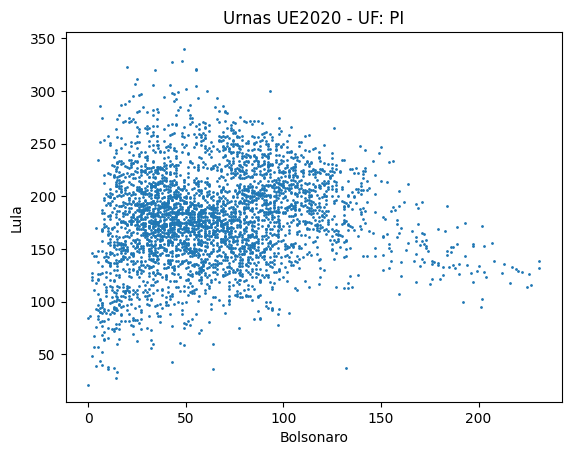

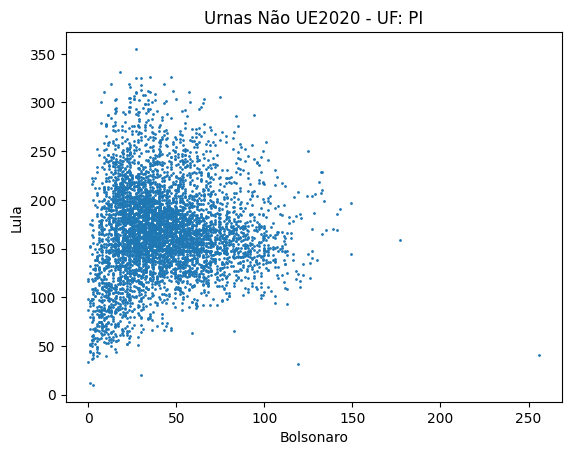

CE


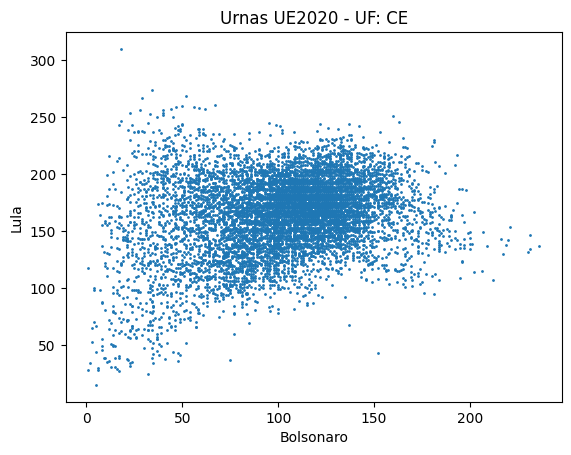

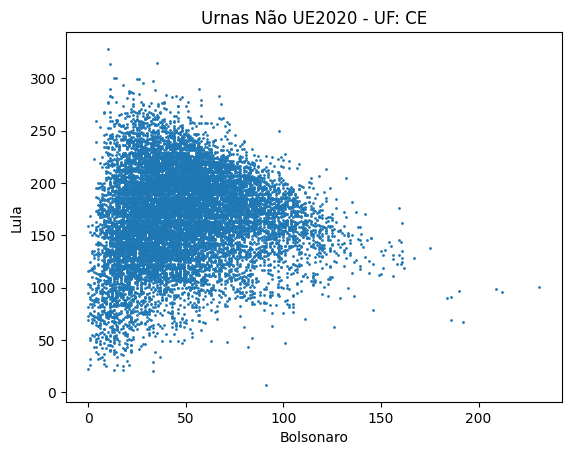

RN


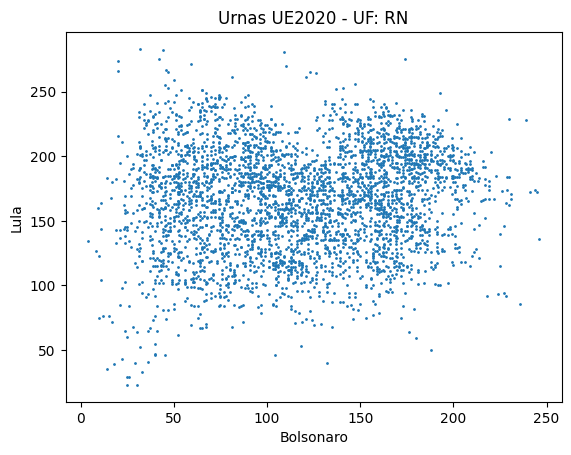

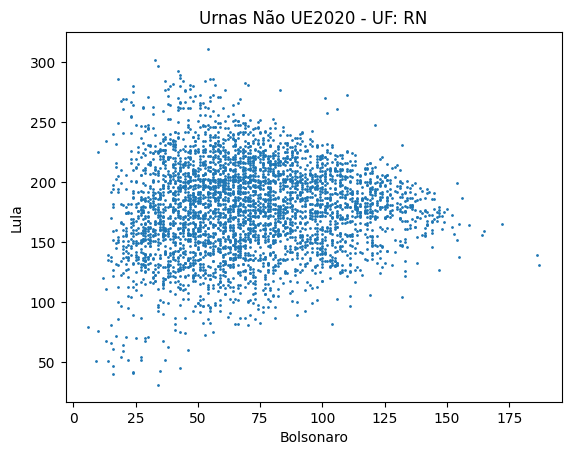

PB


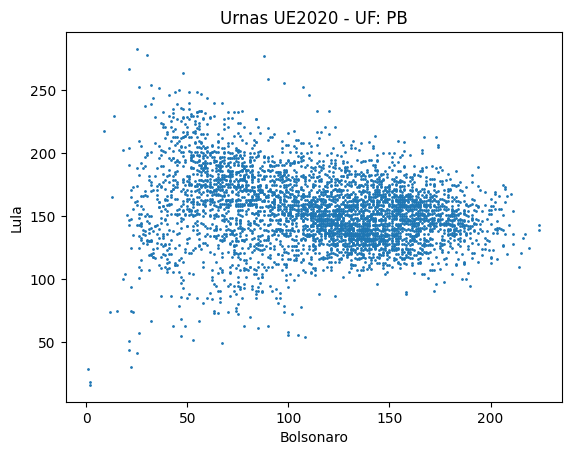

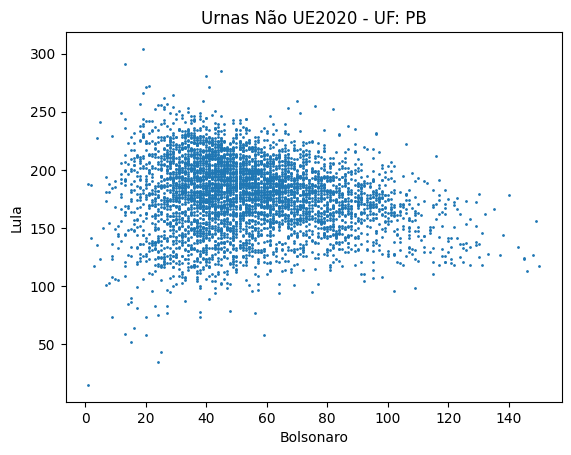

PE


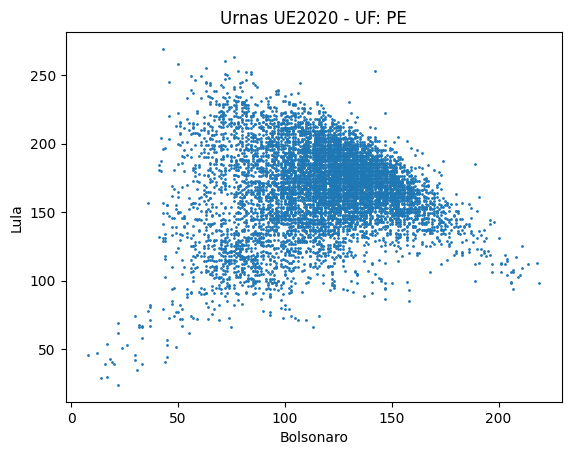

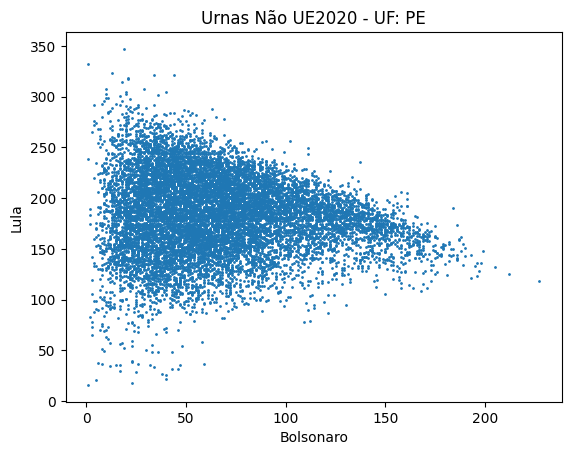

AL


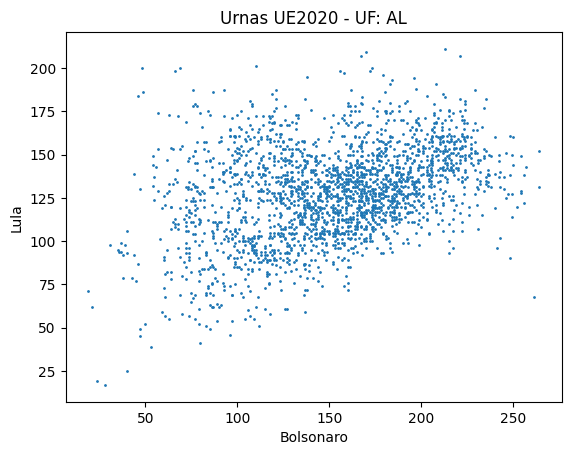

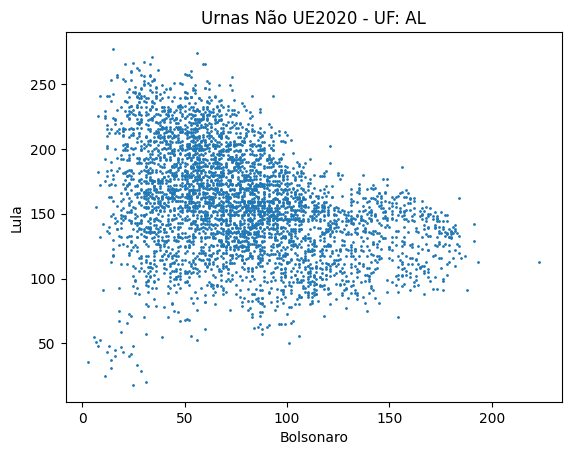

BA


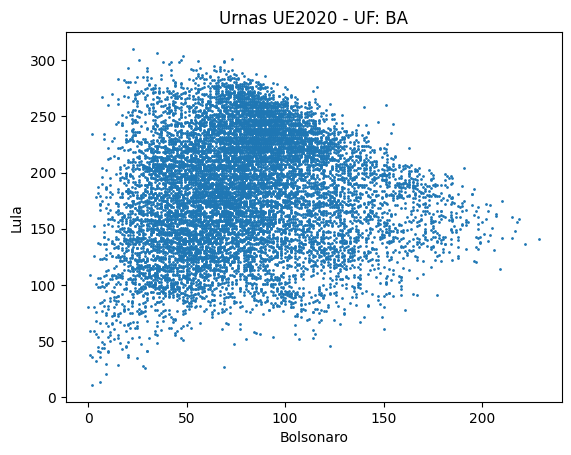

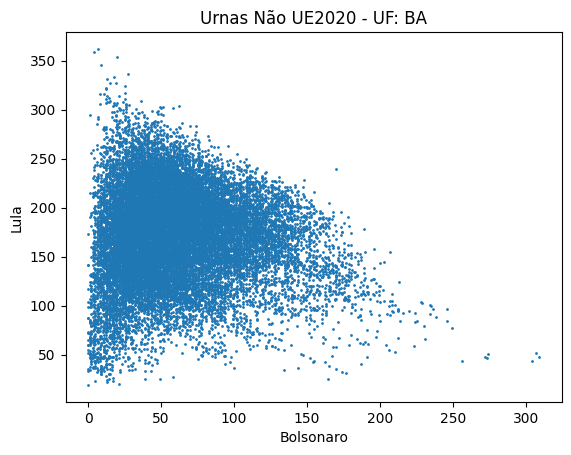

SE


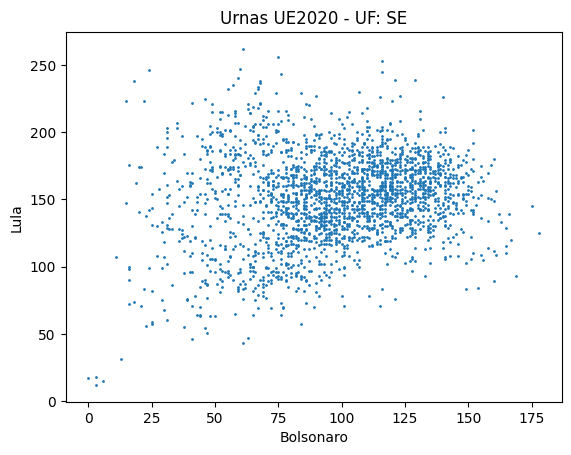

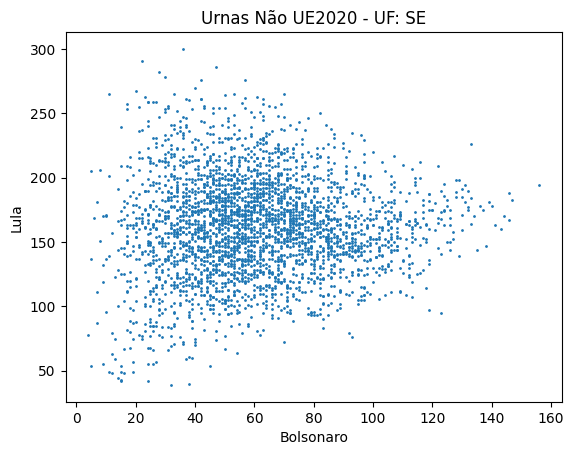

MG


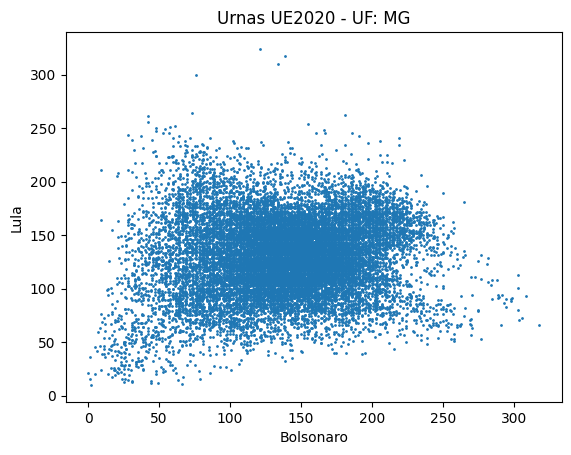

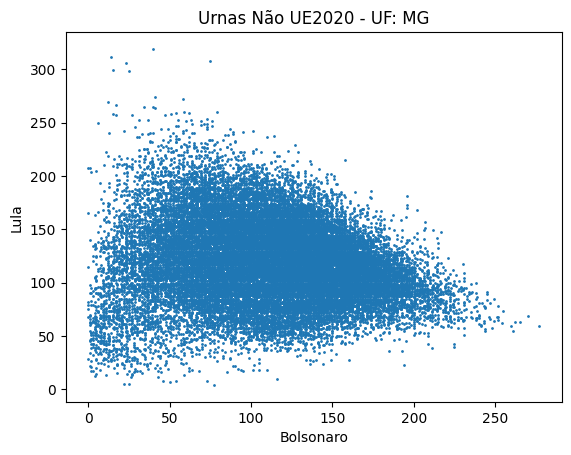

MS


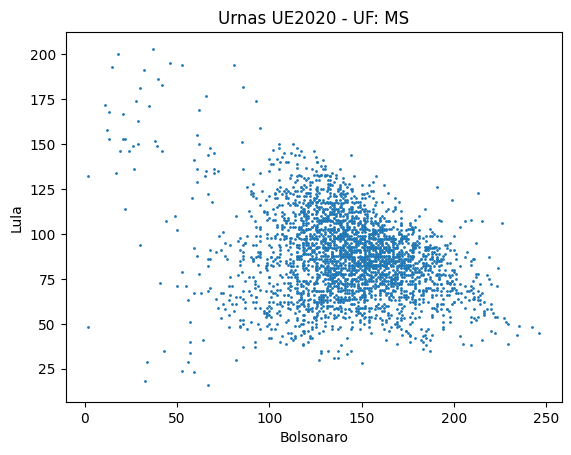

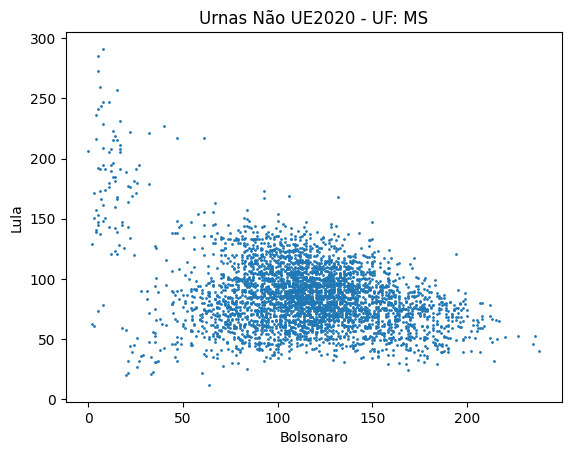

ES


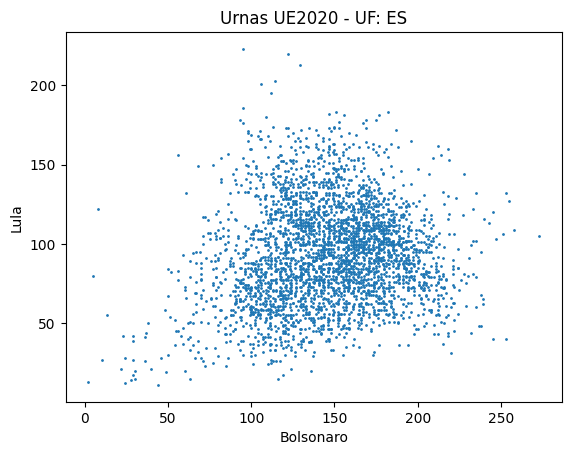

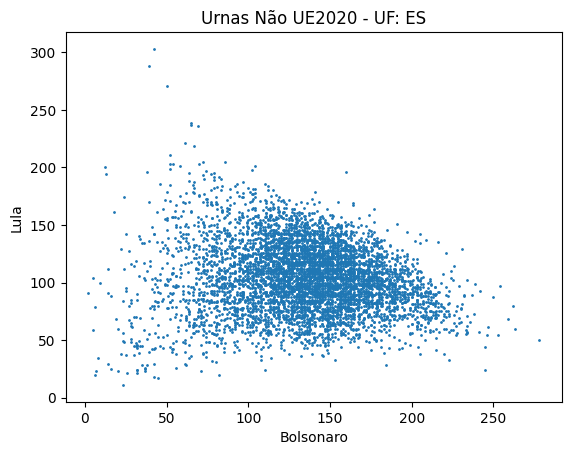

RJ


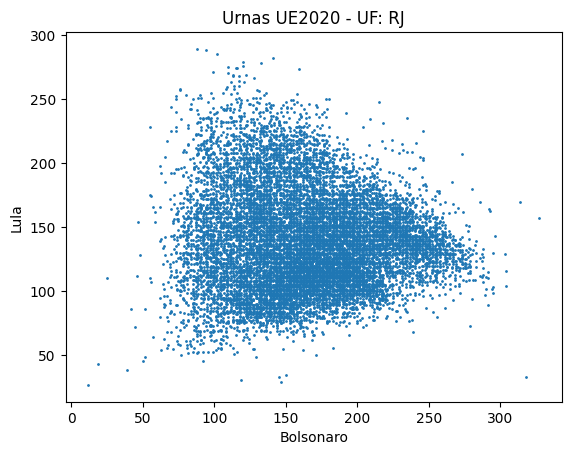

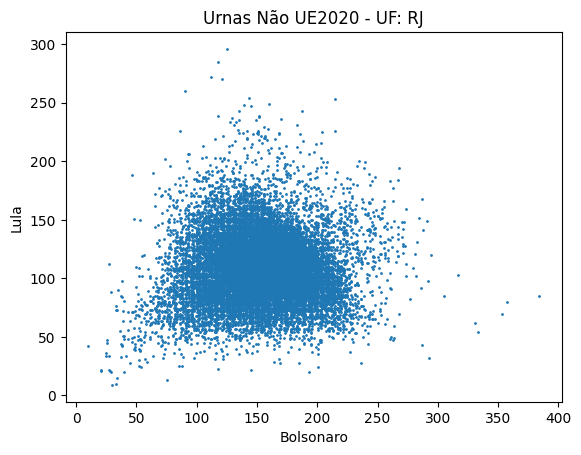

SP


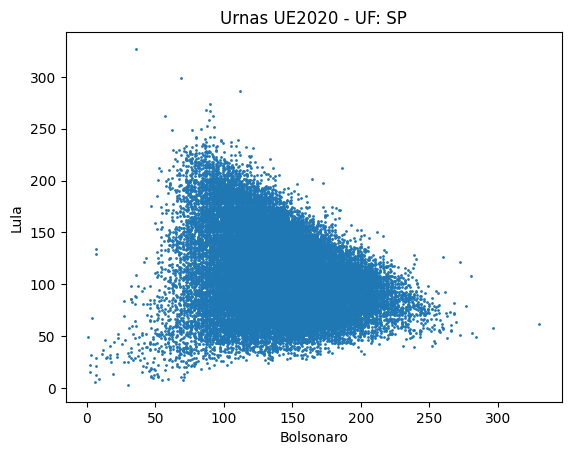

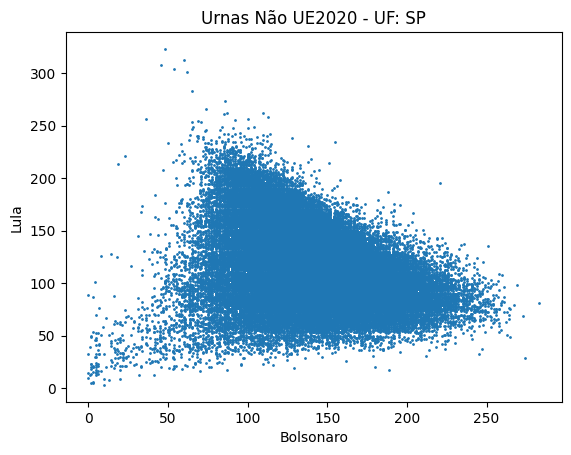

TO


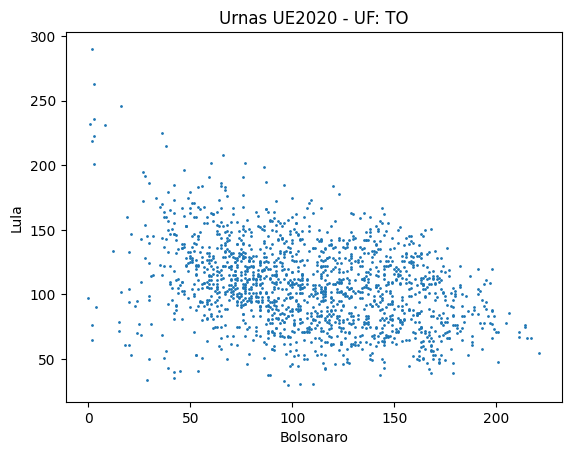

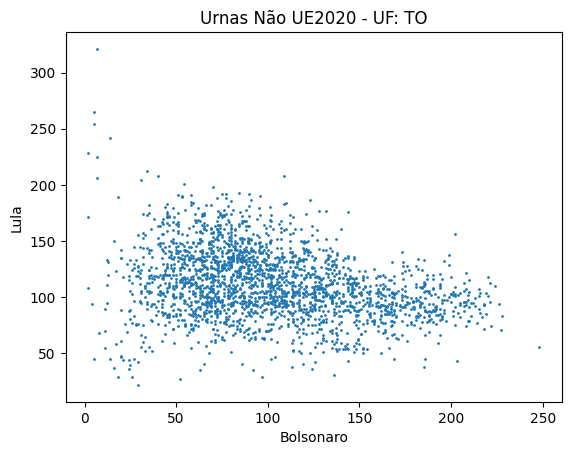

PR


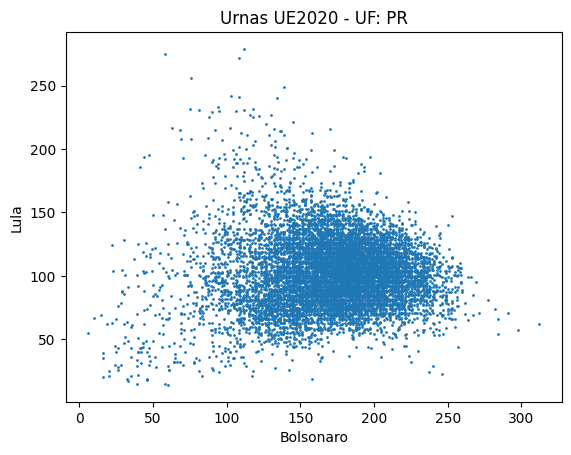

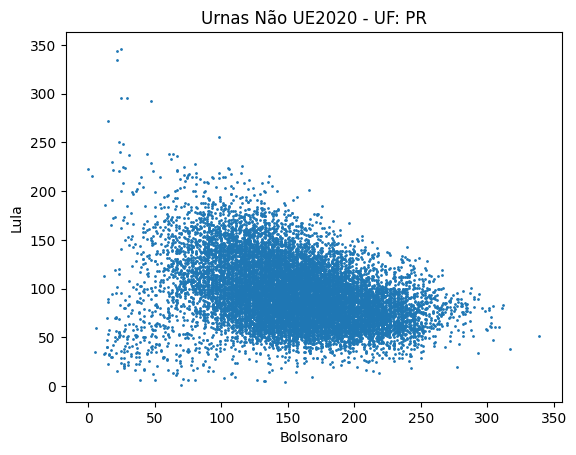

SC


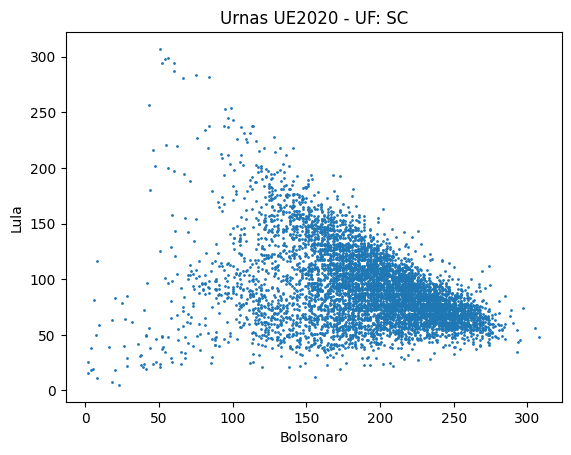

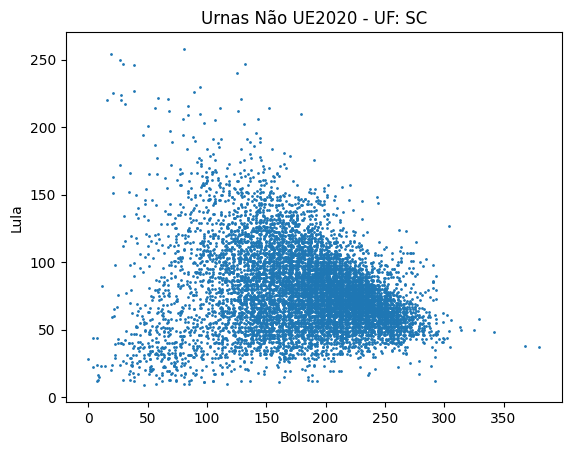

RS


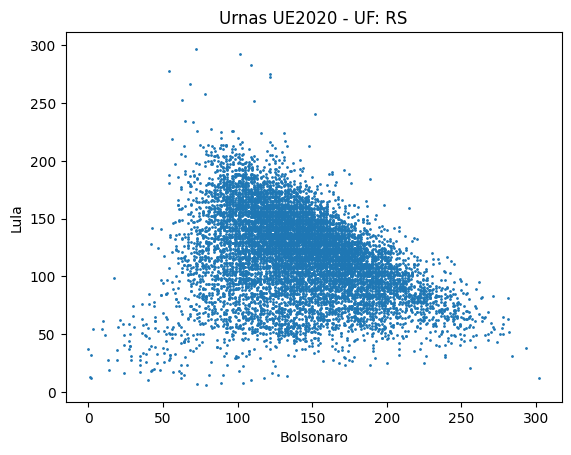

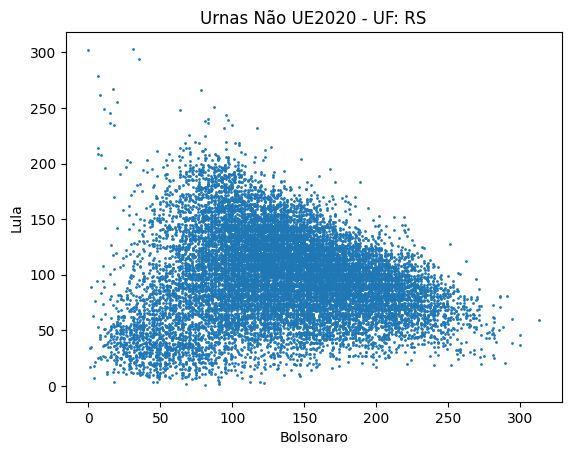

MT


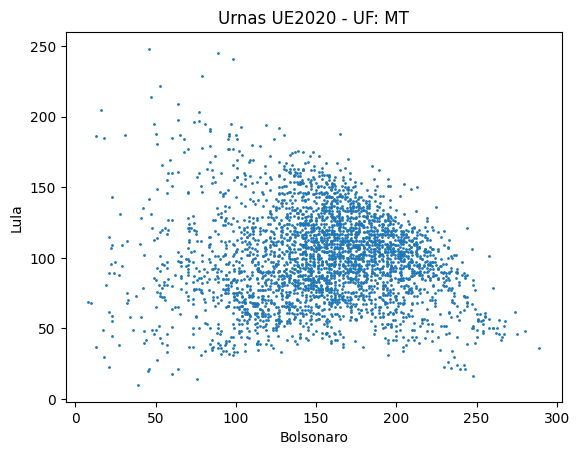

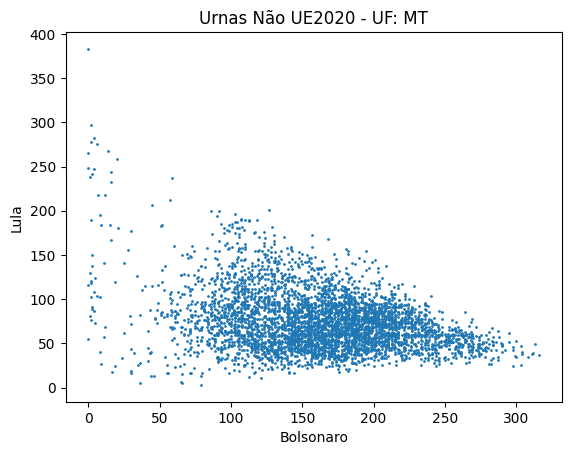

GO


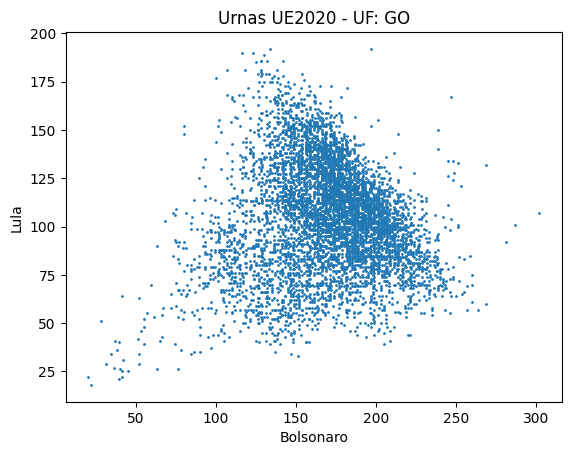

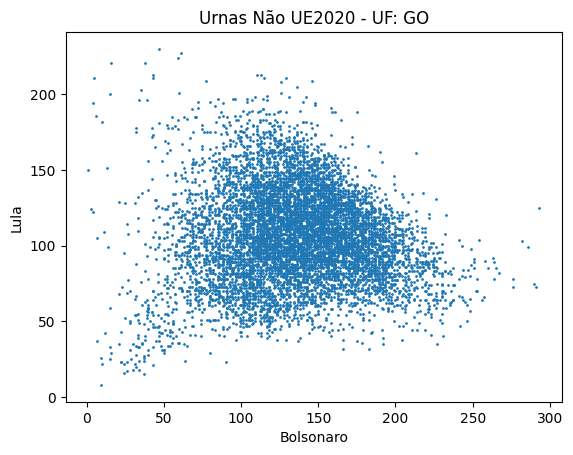

DF


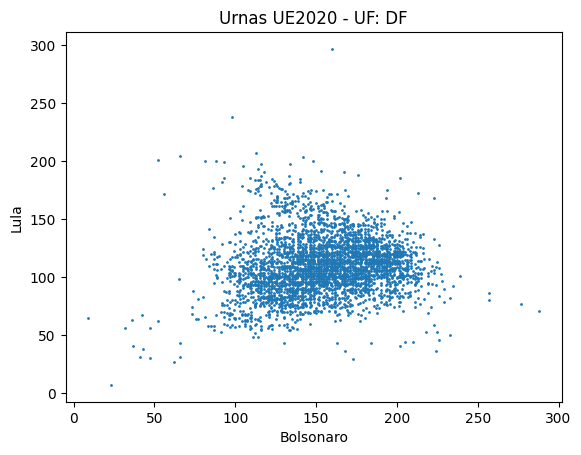

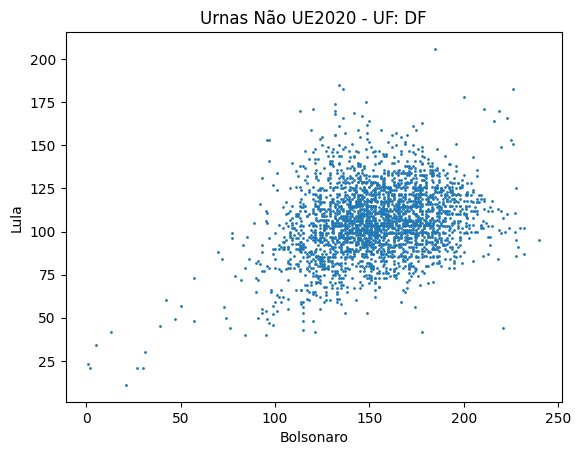

In [19]:
for index, row in votosConsolidados.filter(['UF'], axis=1).drop_duplicates().iterrows():
    print(row['UF'])
    data = votosConsolidados.query("urna == 'UE2020' and UF == '"+row['UF']+"'")
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas UE2020 - UF: "+row['UF'])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

    data = votosConsolidados.query("urna != 'UE2020' and UF == '"+row['UF']+"'")
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas Não UE2020 - UF: "+row['UF'])
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

Aqui outro exercício com urnas aleatórias

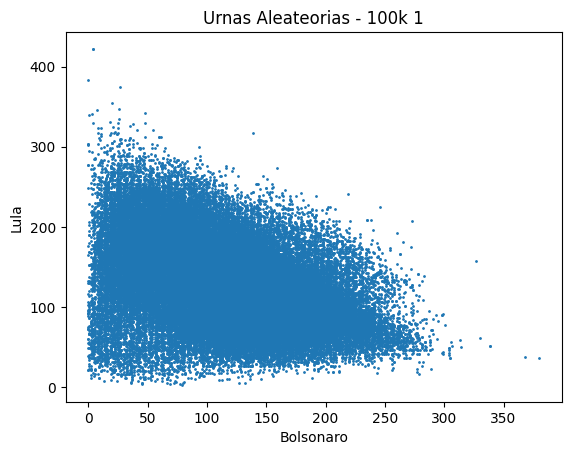

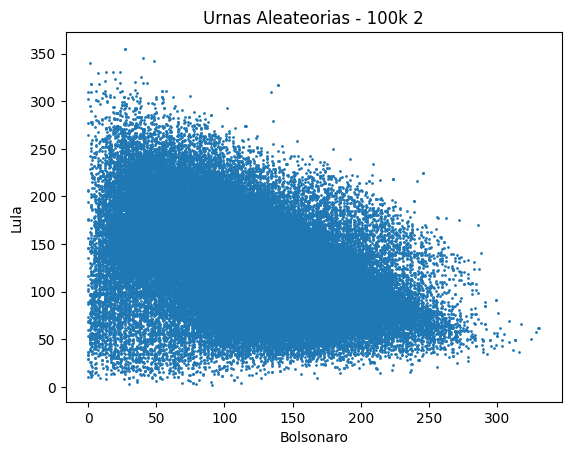

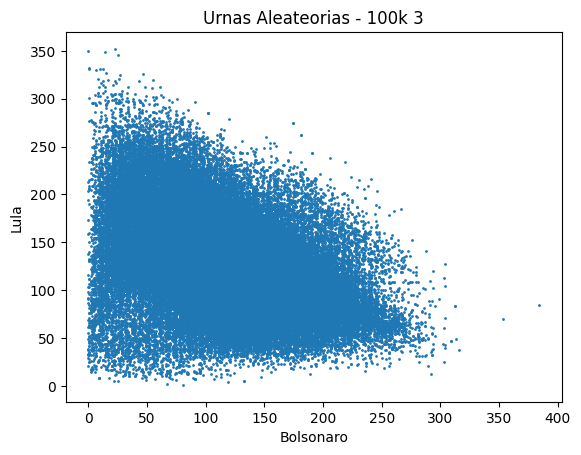

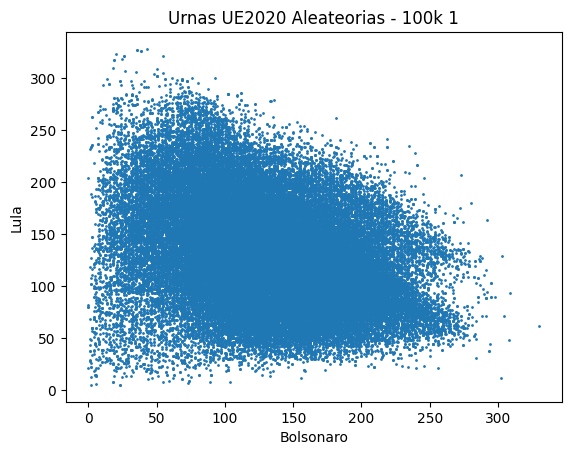

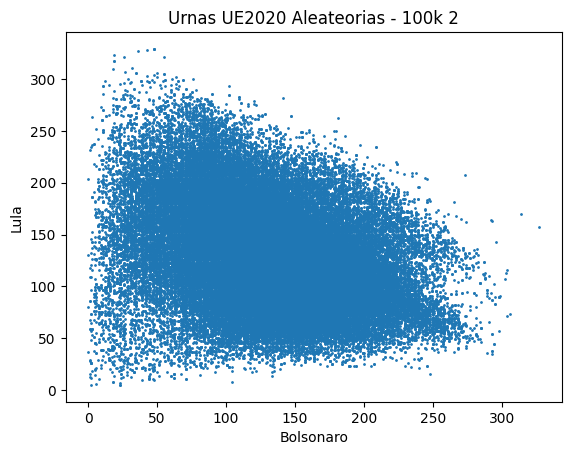

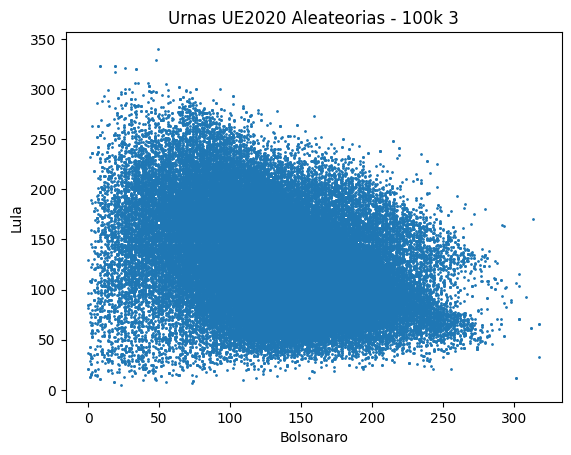

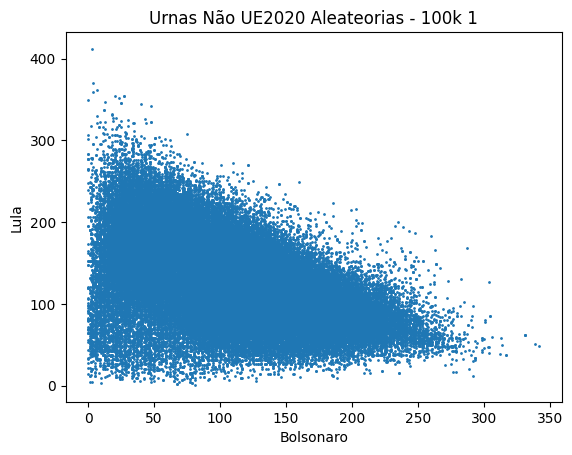

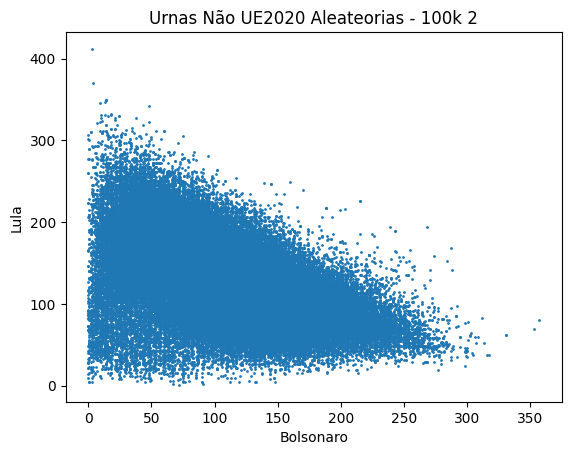

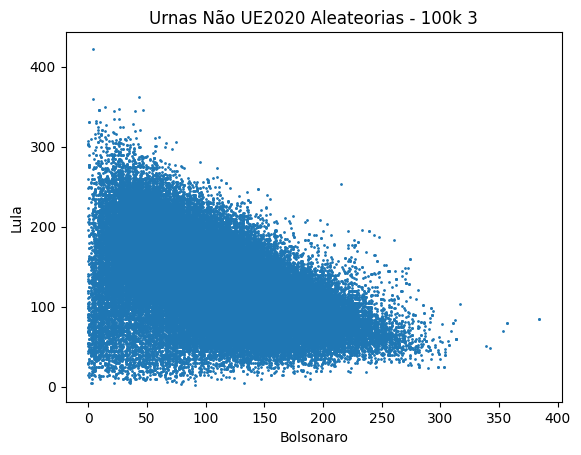

In [20]:
for i in range(3): 
    data = votosConsolidados.sample(n=100000, random_state=random.randint(1,10000), replace=True)
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas Aleateorias - 100k " + str(i+1))
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()


for i in range(3): 
    data = votosConsolidados.query("urna == 'UE2020'").sample(n=100000, random_state=random.randint(1,10000), replace=True)
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas UE2020 Aleateorias - 100k " + str(i+1))
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()
    
for i in range(3): 
    data = votosConsolidados.query("urna != 'UE2020'").sample(n=100000, random_state=random.randint(1,10000), replace=True)
    plt.scatter(data['candidato_22'],data['candidato_13'], s=1)
    plt.title("Urnas Não UE2020 Aleateorias - 100k " + str(i+1))
    plt.xlabel("Bolsonaro")
    plt.ylabel("Lula")
    plt.show()

Resultados

Text(0.5, 1.0, 'Votos Não UE2020')

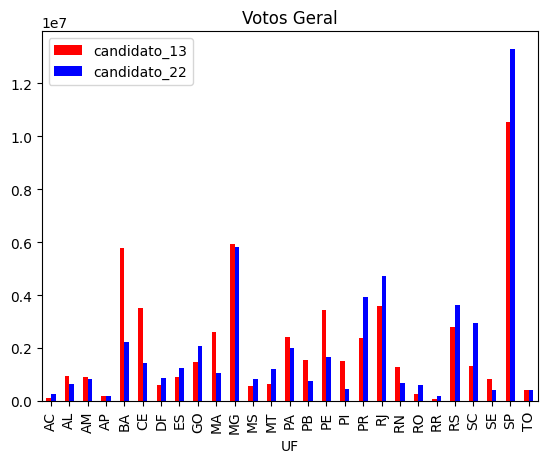

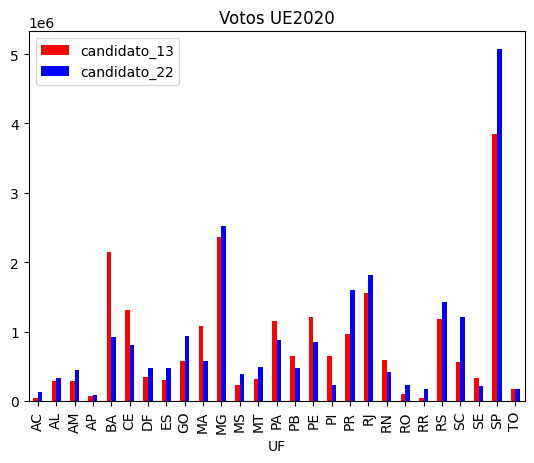

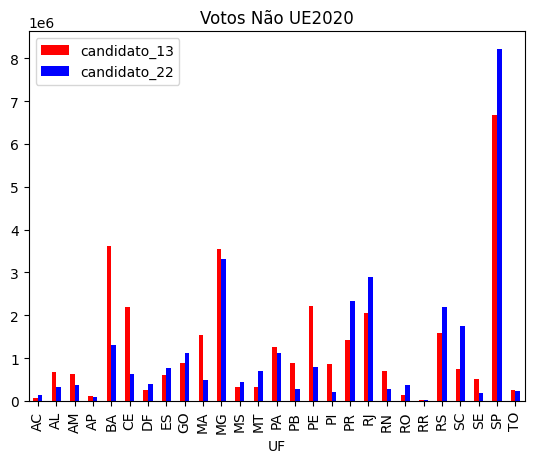

In [21]:
votosConsolidados.groupby(['UF']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos Geral")
votosConsolidados.query("urna == 'UE2020'").groupby(['UF']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos UE2020")
votosConsolidados.query("urna != 'UE2020'").groupby(['UF']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos Não UE2020")

Text(0.5, 1.0, 'Votos por Tipo de Urna')

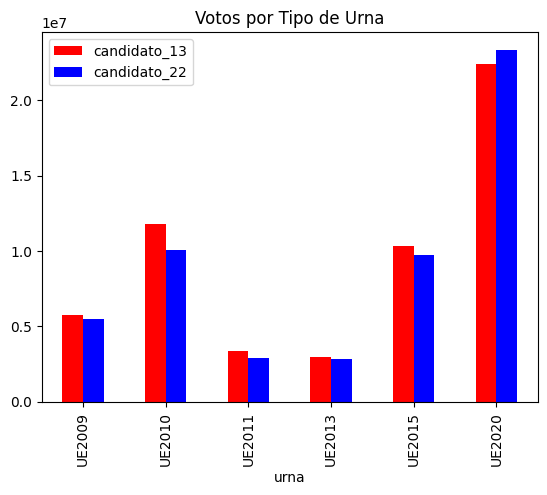

In [22]:
votosConsolidados.groupby(['urna']).sum(numeric_only=True).plot.bar(color=['red','blue']).set_title("Votos por Tipo de Urna")

In [23]:
votos.head()

estado municipio  municipio_cod  zona  secao  candidato_13  candidato_22
0     ac    BUJARI           1007     9      1          75.0         175.0
1     ac    BUJARI           1007     9      2          74.0         183.0
2     ac    BUJARI           1007     9      3          75.0         165.0
3     ac    BUJARI           1007     9      4          89.0         154.0
4     ac    BUJARI           1007     9      5          63.0         150.0

In [24]:
votos.sort_index().to_csv("votos.csv")

In [25]:
votos.shape[0]

470956